## PROYECTO MÓDULO 3: Optimización de Talento

#### A partir de un CSV con datos de trabajadores debemos tratar los datos siguiendo los siguientes pasos:

1. Averiguar por qué se han marchado las empleadas de la empresa.
2. Si queremos más información o pistas podemos preguntarle a Rocío
3. FASES: 
    1. Hacer un EDA
    2. Transformar los datos (limpieza de nulos, normalización, etc.)
    3. Visualización de datos (hacer gráficas en Python). 
    4. BONUS: Diseño de base de datos e insertar los datos en SQL. 
    5. BONUS: Creación de ETL, hacer funciones para automatizar el proceso. 
    6. Hacer una presentación:
        - **Introducción, objetivos, pasos y organización**
        - Parte central: **análisis de los gráficas, tablas...**
        - **¿Qué info podemos obtener de estos? ¿Consejos para la empresa? ¿Mejoras? ¿Encontramos correlación entre variables?**
        - **Retos y soluciones**
        - **Conclusiones**
4. Aplicar metodología Agile y Srum. **Rocío** va a ser la clienta final: **Product Owner**


### PARTE 3: NULOS

In [1]:
#Importar librería
import pandas as pd
import numpy as np 


In [2]:
#Configuración de la visualización del DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#Lectura del CSV y transformación a DataFrame (df)
df=pd.read_csv("HR_RAW_v1.csv", index_col =0)

### DÍA 6: **GESTION DE NULOS**

In [4]:
#Sacamos el % de nulos: 

porc_nulos = ((df.isnull().sum() / df.shape[0]) * 100).round(2)
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
numero_empleado,26.70
estado_civil,40.33
campo_estudios,46.16
frecuencia_viaje,47.83
tipo_jornada,74.04
años_en_activo,32.59
departamento,81.29
horas_extras,41.88
evaluacion_desempeño,12.08
tarifa_hora,5.20


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>%_nulos</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>numero_empleado</th>
      <td>26.70</td>
    </tr>
    <tr>
      <th>estado_civil</th>
      <td>40.33</td>
    </tr>
    <tr>
      <th>campo_estudios</th>
      <td>46.16</td>
    </tr>
    <tr>
      <th>frecuencia_viaje</th>
      <td>47.83</td>
    </tr>
    <tr>
      <th>tipo_jornada</th>
      <td>74.04</td>
    </tr>
    <tr>
      <th>años_en_activo</th>
      <td>32.59</td>
    </tr>
    <tr>
      <th>años_puesto_actual</th>
      <td>97.89</td>
    </tr>
    <tr>
      <th>departamento</th>
      <td>81.29</td>
    </tr>
    <tr>
      <th>rol_y_departamento</th>
      <td>81.29</td>
    </tr>
    <tr>
      <th>horas_extras</th>
      <td>41.88</td>
    </tr>
    <tr>
      <th>evaluacion_desempeño</th>
      <td>12.08</td>
    </tr>
    <tr>
      <th>tarifa_hora</th>
      <td>5.20</td>
    </tr>
    <tr>
      <th>tarifa_diaria</th>
      <td>7.68</td>
    </tr>
    <tr>
      <th>ingreso_mensual</th>
      <td>52.23</td>
    </tr>
    <tr>
      <th>recibe_mismo_salario</th>
      <td>52.23</td>
    </tr>
    <tr>
      <th>nivel_satisfaccion_conciliacion</th>
      <td>6.69</td>
    </tr>
  </tbody>
</table>
</div>

In [6]:
# Frecuencia de viaje: cambiar nulos por 'non-travel'

df['frecuencia_viaje'] = df['frecuencia_viaje'].fillna('non-travel')
df['frecuencia_viaje'].isnull().sum()

0

In [ ]:
# Cambiamos los guiones por espacios para facilitar la legibilidad

df['frecuencia_viaje'] =df['frecuencia_viaje'].str.replace('-',' ').str.replace('_',' ')

In [ ]:
# Comprobamos resultado

df['frecuencia_viaje']

0              non travel
1              non travel
2           travel rarely
3           travel rarely
4              non travel
5              non travel
6              non travel
7           travel rarely
8              non travel
9       travel frequently
10             non travel
11          travel rarely
12             non travel
13          travel rarely
14             non travel
15          travel rarely
16          travel rarely
17          travel rarely
18             non travel
19          travel rarely
20             non travel
21             non travel
22             non travel
23             non travel
24          travel rarely
25             non travel
26             non travel
27             non travel
28          travel rarely
29             non travel
30             non travel
31             non travel
32          travel rarely
33             non travel
34          travel rarely
35          travel rarely
36             non travel
37             non travel
38      trav

In [9]:
# Cambiar los nulos de la columna tipo jornada por 'full time': 

df['tipo_jornada'] = df['tipo_jornada'].fillna('full time')
df['tipo_jornada'].isnull().sum()

0

In [ ]:
# Comprobamos resultado

df['tipo_jornada']

0       full time
1       full time
2       full time
3       full time
4       full time
5       full time
6       full time
7       full time
8       full time
9       full time
10      full time
11      full time
12      full time
13      full time
14      full time
15      full time
16      full time
17      full time
18      full time
19      full time
20      full time
21      full time
22      full time
23      part time
24      full time
25      part time
26      full time
27      full time
28      full time
29      full time
30      full time
31      full time
32      full time
33      part time
34      full time
35      full time
36      full time
37      full time
38      full time
39      part time
40      part time
41      full time
42      full time
43      part time
44      full time
45      full time
46      full time
47      part time
48      part time
49      part time
50      full time
51      part time
52      full time
53      full time
54      full time
55      pa

In [11]:
# Guardamos

df.to_csv("HR_RAW_v2.csv")

In [12]:
# Abrimos

df = pd.read_csv("HR_RAW_v2.csv", index_col = 0)
df.sample(3)

,numero_empleado,desvinculado,genero,edad,año_nacimiento,estado_civil,nivel_estudios,campo_estudios,frecuencia_viaje,distancia_domicilio,teletrabajo,tipo_jornada,formaciones_ultimo_año,trabajos_anteriores,años_en_activo,antigüedad_empresa,años_ultimo_ascenso,años_mismo_responsable,departamento,categoria,puesto,horas_extras,evaluacion_desempeño,tarifa_hora,tarifa_diaria,tarifa_mensual,ingreso_mensual,%_incremento_salarial,acceso_acciones_empresa,nivel_compromiso,nivel_satisfaccion_global,nivel_satisfaccion_trabajo,nivel_ satisfaccion_relaciones,nivel_satisfaccion_conciliacion
1317,704.0,No,male,35,1988,married,3,NaN,non travel,32.19,no,full time,3,1,1.0,1,0,0,NaN,1,laboratory technician,No,3.0,41.0,727.0,16900,NaN,18,2,2,2,3,3,3.0
84,374.0,No,male,55,1968,single,3,Medical,travel rarely,1.61,yes,full time,2,0,37.0,36,4,13,NaN,5,manager,NaN,3.0,81.0,452.0,18938,19045.0,14,0,3,4,1,3,3.0
211,NaN,No,female,31,1992,NaN,2,NaN,non travel,32.19,no,full time,2,1,NaN,9,0,0,sales,2,sales executive,NaN,3.0,45.0,1188.0,24406,NaN,13,1,3,4,3,4,2.0


In [ ]:
# Gestionamos los nulos de las columnas object: sustituimos por NS/NC

columnas_desconocido = ['estado_civil', 'campo_estudios']
for columna in columnas_desconocido:
    df[columna] = df[columna].fillna("ns/nc")
df[columnas_desconocido].isnull().sum()


estado_civil      0
campo_estudios    0
dtype: int64

In [ ]:
# Gestionamos los nulos de las columnas object: sustituimos por "sin asignar"

df['departamento'] = df['departamento'].fillna("sin asignar")
df['departamento'].isnull().sum()

0

In [ ]:
# Gestionamos los nulos de las columnas object: sustituimos por la moda

moda = df['horas_extras'].mode()[0]
df['horas_extras'] = df['horas_extras'].fillna(moda)
df['horas_extras'].isnull().sum()

0

In [16]:
# Guardamos

df.to_csv("HR_RAW_v2.csv")

In [17]:
# Abrimos

df = pd.read_csv("HR_RAW_v2.csv", index_col = 0)
df.sample(3)

,numero_empleado,desvinculado,genero,edad,año_nacimiento,estado_civil,nivel_estudios,campo_estudios,frecuencia_viaje,distancia_domicilio,teletrabajo,tipo_jornada,formaciones_ultimo_año,trabajos_anteriores,años_en_activo,antigüedad_empresa,años_ultimo_ascenso,años_mismo_responsable,departamento,categoria,puesto,horas_extras,evaluacion_desempeño,tarifa_hora,tarifa_diaria,tarifa_mensual,ingreso_mensual,%_incremento_salarial,acceso_acciones_empresa,nivel_compromiso,nivel_satisfaccion_global,nivel_satisfaccion_trabajo,nivel_ satisfaccion_relaciones,nivel_satisfaccion_conciliacion
989,NaN,No,male,38,1985,ns/nc,4,ns/nc,travel frequently,4.83,no,full time,2,3,8.0,2,2,2,sin asignar,1,research scientist,No,3.0,44.0,1186.0,2997,2821.0,16,1,3,3,3,1,3.0
384,1106.0,Yes,male,25,1998,married,1,Technical Degree,non travel,6.44,yes,full time,3,1,7.0,7,5,6,research & development,1,laboratory technician,No,NaN,32.0,1219.0,4605,NaN,15,1,3,4,4,2,4.0
1344,954.0,No,male,40,1983,divorced,4,Marketing,non travel,16.09,yes,part time,2,2,11.0,1,0,0,sales,3,sales executive,No,3.0,67.0,658.0,20652,NaN,12,1,2,1,2,2,2.0


In [19]:
# Gestionamos los nulos de las columnas tipo number: 

columnas_number_con_nulos = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
for col in columnas_number_con_nulos:
    print(col.upper())
    display(((df[col].value_counts() / df.shape[0])*100).round(2))

NUMERO_EMPLEADO


numero_empleado
482.0     0.12
530.0     0.12
507.0     0.12
517.0     0.12
522.0     0.12
523.0     0.12
525.0     0.12
526.0     0.12
544.0     0.12
501.0     0.12
725.0     0.12
724.0     0.12
722.0     0.12
721.0     0.12
717.0     0.12
710.0     0.12
502.0     0.12
495.0     0.12
747.0     0.12
440.0     0.12
734.0     0.12
733.0     0.12
728.0     0.12
423.0     0.12
424.0     0.12
433.0     0.12
447.0     0.12
1140.0    0.12
455.0     0.12
460.0     0.12
465.0     0.12
470.0     0.12
475.0     0.12
478.0     0.12
682.0     0.12
663.0     0.12
653.0     0.12
1069.0    0.12
389.0     0.12
388.0     0.12
381.0     0.12
376.0     0.12
1044.0    0.12
1053.0    0.12
1195.0    0.12
621.0     0.12
1185.0    0.12
1162.0    0.12
1161.0    0.12
1160.0    0.12
1157.0    0.12
1131.0    0.12
401.0     0.12
416.0     0.12
430.0     0.12
438.0     0.12
446.0     0.12
448.0     0.12
454.0     0.12
458.0     0.12
476.0     0.12
483.0     0.12
488.0     0.12
500.0     0.12
534.0     0.12
586.0    

AÑOS_EN_ACTIVO


años_en_activo
10.0    8.92
8.0     5.33
6.0     5.20
9.0     4.28
5.0     4.09
7.0     3.47
4.0     3.35
1.0     3.28
12.0    2.11
3.0     1.98
14.0    1.86
13.0    1.86
11.0    1.80
15.0    1.73
16.0    1.73
20.0    1.73
18.0    1.67
21.0    1.43
17.0    1.36
2.0     1.30
22.0    1.12
19.0    1.05
24.0    0.87
23.0    0.81
28.0    0.81
26.0    0.50
0.0     0.50
29.0    0.37
36.0    0.37
25.0    0.37
33.0    0.37
37.0    0.31
27.0    0.31
31.0    0.25
30.0    0.19
32.0    0.19
35.0    0.19
40.0    0.19
34.0    0.12
38.0    0.06
Name: count, dtype: float64

EVALUACION_DESEMPEÑO


evaluacion_desempeño
3.0    74.66
4.0    13.26
Name: count, dtype: float64

TARIFA_HORA


tarifa_hora
42.0     2.04
66.0     1.98
48.0     1.86
84.0     1.80
57.0     1.80
54.0     1.73
46.0     1.73
98.0     1.73
87.0     1.67
92.0     1.67
96.0     1.67
72.0     1.67
56.0     1.61
79.0     1.61
32.0     1.61
86.0     1.55
81.0     1.55
52.0     1.55
61.0     1.55
83.0     1.49
62.0     1.49
51.0     1.49
82.0     1.49
43.0     1.43
74.0     1.43
77.0     1.43
41.0     1.43
94.0     1.43
88.0     1.43
73.0     1.43
45.0     1.43
60.0     1.36
95.0     1.36
78.0     1.36
76.0     1.30
59.0     1.30
99.0     1.30
80.0     1.30
67.0     1.30
91.0     1.24
97.0     1.24
75.0     1.24
90.0     1.24
85.0     1.24
44.0     1.24
49.0     1.24
64.0     1.18
55.0     1.18
65.0     1.18
71.0     1.18
100.0    1.18
39.0     1.18
37.0     1.18
36.0     1.12
40.0     1.12
58.0     1.12
93.0     1.05
35.0     1.05
70.0     1.05
33.0     1.05
89.0     1.05
30.0     1.05
63.0     0.99
31.0     0.99
69.0     0.99
50.0     0.93
47.0     0.93
68.0     0.81
53.0     0.81
38.0     0.74
34.0    

TARIFA_DIARIA


tarifa_diaria
691.0     0.43
329.0     0.43
147.0     0.37
408.0     0.37
530.0     0.37
827.0     0.31
334.0     0.31
1329.0    0.31
1082.0    0.31
1157.0    0.31
1283.0    0.31
906.0     0.31
427.0     0.31
950.0     0.31
688.0     0.31
303.0     0.25
1003.0    0.25
465.0     0.25
715.0     0.25
921.0     0.25
1490.0    0.25
1099.0    0.25
1092.0    0.25
977.0     0.25
1018.0    0.25
933.0     0.25
430.0     0.25
1225.0    0.25
829.0     0.25
1469.0    0.25
575.0     0.25
793.0     0.25
895.0     0.25
217.0     0.25
805.0     0.25
589.0     0.25
654.0     0.25
1276.0    0.25
703.0     0.25
201.0     0.25
1485.0    0.25
240.0     0.25
661.0     0.25
501.0     0.25
482.0     0.25
1229.0    0.25
1107.0    0.25
1180.0    0.25
1495.0    0.19
238.0     0.19
142.0     0.19
1277.0    0.19
890.0     0.19
397.0     0.19
616.0     0.19
806.0     0.19
548.0     0.19
1184.0    0.19
991.0     0.19
136.0     0.19
318.0     0.19
852.0     0.19
853.0     0.19
1097.0    0.19
528.0     0.19
685.0     0

INGRESO_MENSUAL


ingreso_mensual
6347.0     0.25
5304.0     0.25
2657.0     0.19
2258.0     0.19
5405.0     0.12
8224.0     0.12
2610.0     0.12
5731.0     0.12
2539.0     0.12
2376.0     0.12
11713.0    0.12
2216.0     0.12
19189.0    0.12
3452.0     0.12
2070.0     0.12
8793.0     0.12
2587.0     0.12
4960.0     0.12
11159.0    0.12
5396.0     0.12
2782.0     0.12
4197.0     0.12
9434.0     0.12
5337.0     0.12
2741.0     0.12
2791.0     0.12
5828.0     0.12
2909.0     0.12
2033.0     0.12
2821.0     0.12
7756.0     0.12
2042.0     0.12
6632.0     0.12
7587.0     0.12
4335.0     0.12
5980.0     0.12
4244.0     0.12
5228.0     0.12
2700.0     0.12
2380.0     0.12
2404.0     0.12
2377.0     0.12
2366.0     0.12
2329.0     0.12
4294.0     0.12
6725.0     0.12
10325.0    0.12
4447.0     0.12
10845.0    0.12
3420.0     0.12
4805.0     0.12
17861.0    0.12
5605.0     0.12
6162.0     0.12
6410.0     0.12
13212.0    0.12
3034.0     0.12
5974.0     0.12
2119.0     0.12
2144.0     0.12
5373.0     0.12
5257.0  

NIVEL_SATISFACCION_CONCILIACION


nivel_satisfaccion_conciliacion
3.0    56.57
2.0    22.24
4.0     9.60
1.0     4.89
Name: count, dtype: float64

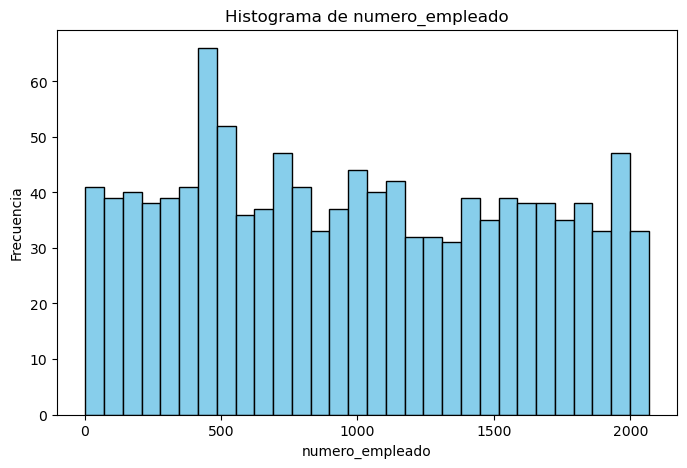

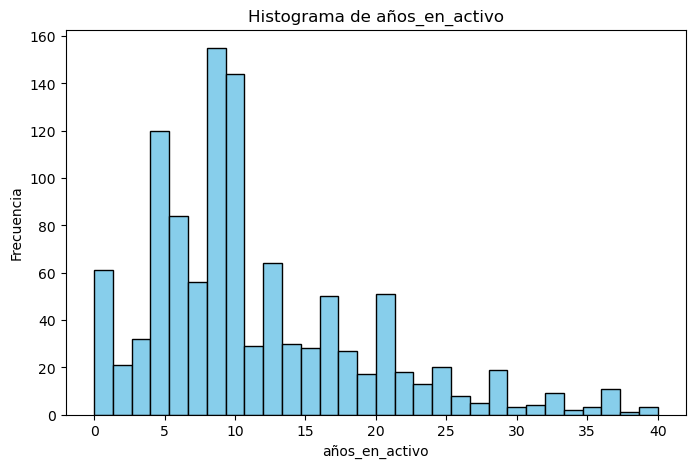

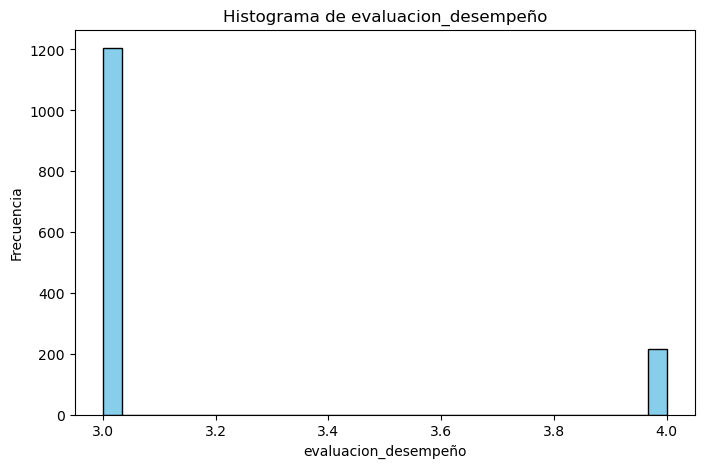

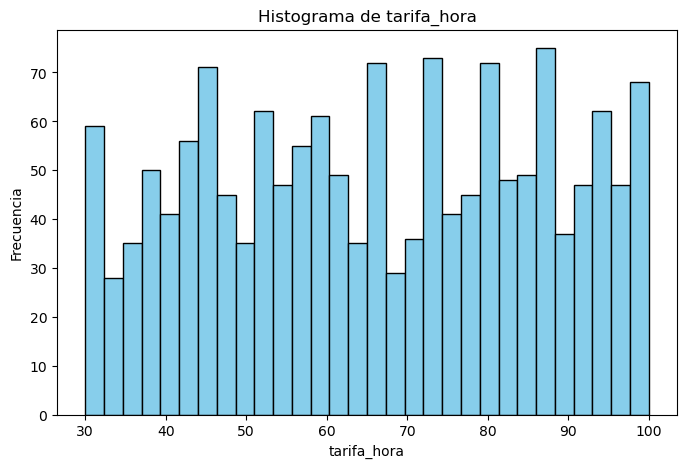

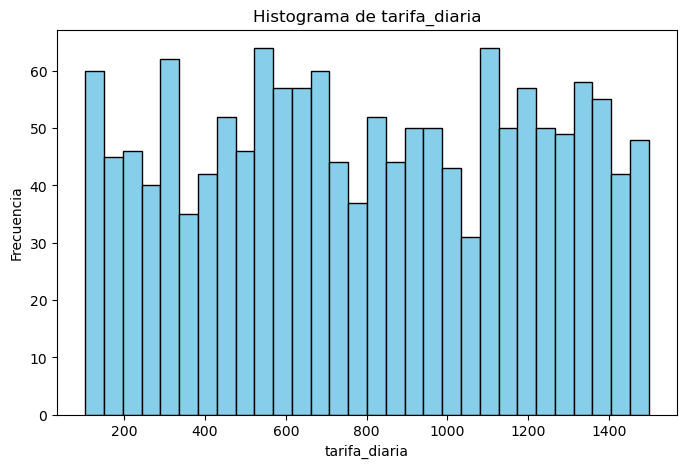

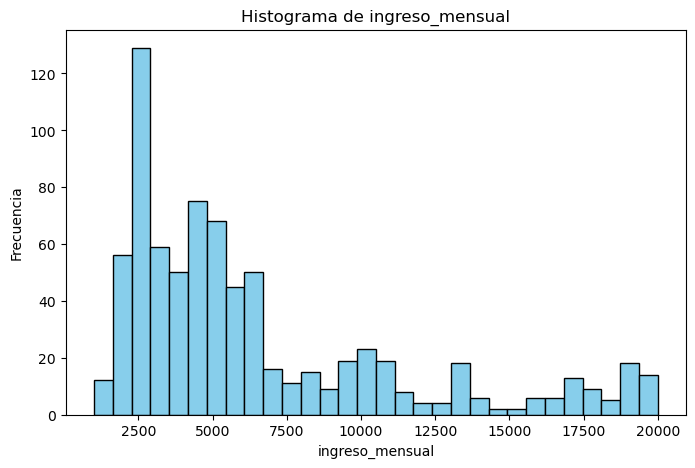

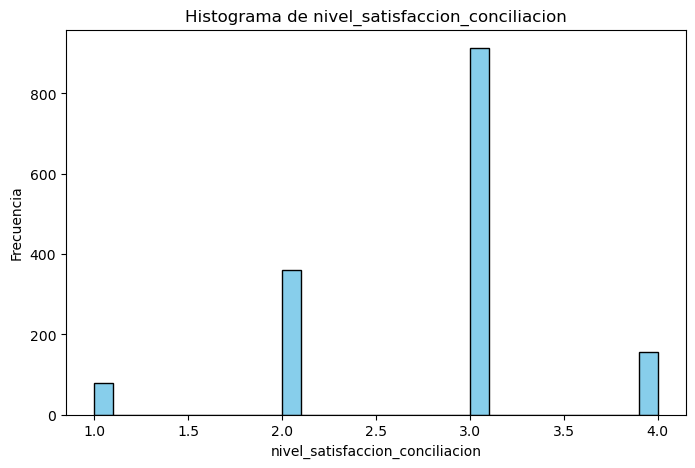

In [20]:
# Creación gráficas para datos
import matplotlib.pyplot as plt
# Lista de columnas para las que quieres hacer histogramas

# Crear un histograma separado para cada columna
for col in list(columnas_number_con_nulos):
    plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [21]:
# Guardamos

df.to_csv("HR_RAW_v2.csv")

In [22]:
# Abrimos

df = pd.read_csv("HR_RAW_v2.csv", index_col = 0)
df.sample(3)

,numero_empleado,desvinculado,genero,edad,año_nacimiento,estado_civil,nivel_estudios,campo_estudios,frecuencia_viaje,distancia_domicilio,teletrabajo,tipo_jornada,formaciones_ultimo_año,trabajos_anteriores,años_en_activo,antigüedad_empresa,años_ultimo_ascenso,años_mismo_responsable,departamento,categoria,puesto,horas_extras,evaluacion_desempeño,tarifa_hora,tarifa_diaria,tarifa_mensual,ingreso_mensual,%_incremento_salarial,acceso_acciones_empresa,nivel_compromiso,nivel_satisfaccion_global,nivel_satisfaccion_trabajo,nivel_ satisfaccion_relaciones,nivel_satisfaccion_conciliacion
218,NaN,Yes,female,29,1994,ns/nc,1,ns/nc,non travel,37.01,yes,full time,3,1,11.0,11,3,10,sin asignar,3,sales executive,No,NaN,45.0,408.0,11162,NaN,13,1,2,4,1,1,1.0
88,NaN,No,male,43,1980,ns/nc,3,ns/nc,non travel,19.31,yes,part time,3,1,NaN,25,3,9,sin asignar,4,research director,No,3.0,59.0,982.0,4345,NaN,11,1,2,1,2,3,NaN
650,1736.0,No,female,31,1992,single,1,Technical Degree,travel frequently,38.62,yes,part time,3,2,9.0,5,1,4,sin asignar,2,manufacturing director,No,4.0,30.0,163.0,6670,NaN,20,0,3,4,4,4,2.0
